In [103]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd

In [104]:
# parser = CoreNLPParser(url='http://localhost:8888', tagtype='pos')

In [136]:
sent = "Where was the match between Kings XI and Daredevils played on 9/12/2018?"
tok_sent = nltk.word_tokenize(sent)

In [137]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [138]:
tokenized_sent = preprocess(sent)

In [139]:
# list(parser.tag(sent.split()))
print(tokenized_sent)
pattern = """NP: {<JJ>*<NN>*<NNS>*<NNP>*<NNPS>*}
            Date: {<CD>}"""

[('Where', 'WRB'), ('was', 'VBD'), ('the', 'DT'), ('match', 'NN'), ('between', 'IN'), ('Kings', 'NNP'), ('XI', 'NNP'), ('and', 'CC'), ('Daredevils', 'NNP'), ('played', 'VBD'), ('on', 'IN'), ('9/12/2018', 'CD'), ('?', '.')]


In [140]:
cp = nltk.RegexpParser(pattern)
tree = cp.parse(tokenized_sent)
print(tree)

(S
  Where/WRB
  was/VBD
  the/DT
  (NP match/NN)
  between/IN
  (NP Kings/NNP XI/NNP)
  and/CC
  (NP Daredevils/NNP)
  played/VBD
  on/IN
  (Date 9/12/2018/CD)
  ?/.)


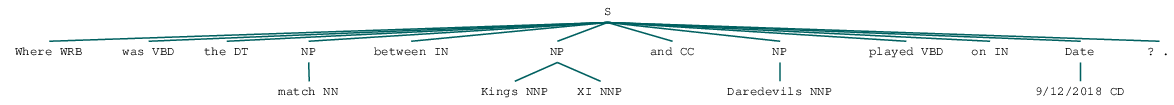

In [141]:
tree

In [142]:
def ExtractPhrases(tree, phrase):
    myPhrases = []
    if (tree.label() == phrase):
        myPhrases.append( tree.copy(True))
    for child in tree:
        if (type(child) is nltk.tree.Tree):
            list_of_phrases = ExtractPhrases(child, phrase)
            if (len(list_of_phrases) > 0):
                myPhrases.extend(list_of_phrases)
    return myPhrases

lst = ExtractPhrases(tree, 'NP')
date = ExtractPhrases(tree, 'Date')
for phrase in lst:
    print(phrase)
print(date)

(NP match/NN)
(NP Kings/NNP XI/NNP)
(NP Daredevils/NNP)
[Tree('Date', [('9/12/2018', 'CD')])]


In [143]:
date = date[0][0][0]
print(date)

9/12/2018


In [144]:
noun_phrase = []
for l in lst:
    temp = ""
    for i in range(len(l)):
        temp += l[i][0]
        temp += " "
    temp = temp.strip()
    noun_phrase.append(temp)
print(noun_phrase)

['match', 'Kings XI', 'Daredevils']


In [145]:
teams = ['Mum Indians', 'Kings XI', 'KKR', 'Sunrisers', 'Super Kings', 'Royals', 'RCB', 'Daredevils']

In [146]:
grounds = ['Mumbai', 'Mohali', 'Kolkata', 'Hyderabad (Deccan)', 'Chennai', 'Jaipur', 'Bengaluru', 'Pune', 'Delhi', 'Indore']

In [147]:
batsmen_r = ['KL Rahul †', 'CH Gayle', 'Yuvraj Singh', 'KK Nair', 'AR Patel', 'MP Stoinis', 'MA Agarwal', 'R Ashwin (c)', 'BATSMEN', 'SA Yadav', 'E Lewis', 'Ishan Kishan †', 'HH Pandya', 'RG Sharma (c)', 'KH Pandya', 'PP Shaw', 'GJ Maxwell', 'SS Iyer (c)', 'RR Pant †', 'V Shankar', 'Abhishek Sharma', 'KA Pollard', 'BCJ Cutting', 'M Markande', 'JJ Bumrah', 'Mustafizur Rahman', 'C Munro', 'LE Plunkett', 'DJM Short', 'JC Buttler †', 'SV Samson', 'BA Stokes', 'RA Tripathi', 'K Gowtham', 'JC Archer', 'SR Watson', 'AT Rayudu', 'SK Raina', 'MS Dhoni (c) †', 'SW Billings', 'DJ Bravo', 'RA Jadeja', 'AM Rahane (c)', 'H Klaasen', 'STR Binny', 'S Gopal', 'JD Unadkat', 'B Laughlin', 'AJ Finch', 'AJ Tye', 'MM Sharma', 'Mujeeb Ur Rahman', 'Q de Kock †', 'BB McCullum', 'V Kohli (c)', 'AB de Villiers', 'SN Khan', 'Mandeep Singh', 'CR Woakes', 'Washington Sundar', 'PJ Sangwan', 'WP Saha †', 'S Dhawan', 'KS Williamson (c)', 'MK Pandey', 'Shakib Al Hasan', 'DJ Hooda', 'YK Pathan', 'Rashid Khan', 'S Kaul', 'Sandeep Sharma', 'B Stanlake', 'CA Lynn', 'SP Narine', 'RV Uthappa', 'N Rana', 'KD Karthik (c) †', 'AD Russell', 'Shubman Gill', 'TK Curran', 'PP Chawla', 'Shivam Mavi', 'G Gambhir (c)', 'JJ Roy', 'SS Iyer', 'R Tewatia', 'CH Morris', 'Mohammed Shami', 'S Nadeem', 'TA Boult', 'PA Patel †', 'MM Ali', 'C de Grandhomme', 'TG Southee', 'AD Hales', 'CJ Anderson', 'P Negi', 'UT Yadav', 'Mohammed Siraj', 'AS Rajpoot', 'JPR Scantlebury-Searles', 'H Klaasen †', 'SP Goswami †', 'CR Brathwaite', 'B Kumar', 'RK Singh', 'R Vinay Kumar', 'NV Ojha', 'DT Christian', 'MJ McClenaghan', 'F du Plessis', 'Basil Thampi', 'MK Lomror', 'MK Tiwary', 'DA Miller', 'BB Sran', 'A Mishra', 'M Vohra', 'JP Duminy', 'Mohammad Nabi', 'HV Patel', 'IS Sodhi', 'Anureet Singh', 'DS Kulkarni', 'M Ashwin', 'DR Shorey', 'M Vijay', 'KV Sharma', 'MG Johnson', 'DL Chahar', 'AD Nath', 'Harbhajan Singh', 'SN Thakur', 'YS Chahal', 'A Dananjaya', 'Kuldeep Yadav', 'M Prasidh Krishna', 'RK Bhui', 'P Chopra', 'KM Jadhav', 'MA Wood', 'Imran Tahir']
batsmen = []
for x in batsmen_r:
    batsmen.append(' '.join(x.split(' ')[:2]))
print(batsmen)

['KL Rahul', 'CH Gayle', 'Yuvraj Singh', 'KK Nair', 'AR Patel', 'MP Stoinis', 'MA Agarwal', 'R Ashwin', 'BATSMEN', 'SA Yadav', 'E Lewis', 'Ishan Kishan', 'HH Pandya', 'RG Sharma', 'KH Pandya', 'PP Shaw', 'GJ Maxwell', 'SS Iyer', 'RR Pant', 'V Shankar', 'Abhishek Sharma', 'KA Pollard', 'BCJ Cutting', 'M Markande', 'JJ Bumrah', 'Mustafizur Rahman', 'C Munro', 'LE Plunkett', 'DJM Short', 'JC Buttler', 'SV Samson', 'BA Stokes', 'RA Tripathi', 'K Gowtham', 'JC Archer', 'SR Watson', 'AT Rayudu', 'SK Raina', 'MS Dhoni', 'SW Billings', 'DJ Bravo', 'RA Jadeja', 'AM Rahane', 'H Klaasen', 'STR Binny', 'S Gopal', 'JD Unadkat', 'B Laughlin', 'AJ Finch', 'AJ Tye', 'MM Sharma', 'Mujeeb Ur', 'Q de', 'BB McCullum', 'V Kohli', 'AB de', 'SN Khan', 'Mandeep Singh', 'CR Woakes', 'Washington Sundar', 'PJ Sangwan', 'WP Saha', 'S Dhawan', 'KS Williamson', 'MK Pandey', 'Shakib Al', 'DJ Hooda', 'YK Pathan', 'Rashid Khan', 'S Kaul', 'Sandeep Sharma', 'B Stanlake', 'CA Lynn', 'SP Narine', 'RV Uthappa', 'N Rana', 

In [148]:
bowlers = ['R Ashwin', 'MM Sharma', 'Mujeeb Ur Rahman', 'AR Patel', 'AJ Tye', 'MP Stoinis', 'Bowling', 'TA Boult', 'Mohammed Shami', 'A Mishra', 'CH Morris', 'DT Christian', 'R Tewatia', 'N Rana', 'M Prasidh Krishna', 'MG Johnson', 'SP Narine', 'PP Chawla', 'Kuldeep Yadav', 'AD Russell', 'MJ McClenaghan', 'JJ Bumrah', 'HH Pandya', 'KH Pandya', 'M Markande', 'BCJ Cutting', 'Sandeep Sharma', 'B Stanlake', 'Rashid Khan', 'S Kaul', 'Shakib Al Hasan', 'PJ Sangwan', 'Mustafizur Rahman', 'JP Duminy', 'TG Southee', 'UT Yadav', 'Mohammed Siraj', 'YS Chahal', 'Washington Sundar', 'C de Grandhomme', 'Shivam Mavi', 'B Kumar', 'KK Ahmed', 'CR Brathwaite', 'S Nadeem', 'V Shankar', 'TK Curran', 'BB Sran', 'JPR Scantlebury-Searles', 'Basil Thampi', 'MM Ali', 'DS Kulkarni', 'JD Unadkat', 'K Gowtham', 'B Laughlin', 'S Gopal', 'BA Stokes', 'DJM Short', 'DL Chahar', 'L Ngidi', 'Harbhajan Singh', 'SN Thakur', 'DJ Bravo', 'RA Jadeja', 'AS Rajpoot', 'JC Archer', 'Yuvraj Singh', 'SR Watson', 'MA Wood', 'Imran Tahir', 'Anureet Singh', 'Avesh Khan', 'LE Plunkett', 'GJ Maxwell', 'IS Sodhi', 'S Lamichhane', 'CJ Dala', 'HV Patel', 'M Ashwin', 'DJ Hooda', 'KV Sharma', 'MK Tiwary', 'Mohammad Nabi', 'KM Asif', 'MK Lomror', 'YK Pathan', 'CJ Jordan', 'CR Woakes', 'K Khejroliya', 'A Dananjaya', 'DJ Willey', 'CJ Anderson', 'R Vinay Kumar', 'STR Binny', 'P Negi', 'Ankit Sharma']

In [149]:
def type1(team1, team2, ground, flag):
    df = pd.read_csv('../data/match-data.csv')
    x = df
    gr_filter = (x['Ground'] == ground)
    x = x[gr_filter]
    team_filter = ((x['Team 1'] == team1) & (x['Team 2'] == team2)) | ((x['Team 1'] == team2) & (x['Team 2'] == team1))
    x = x[team_filter]
    res = ""
    if flag == 1:
        for i in x['Winner'].values:
            if res != "":
                res += ", "
            res += i
    else:
        if team1 == str(x['Winner'].values[0]):
            res = team2
        else:
            res = team1
    return res

In [151]:
# given date and team names return the ground.
def type2(team1, team2, date):
    pass

In [152]:
no_of_teams = 0
fl = 0
team1 = ""
team2 = ""
ground = ""
batsman = ""
bowler = ""
for name in noun_phrase:
    if name in teams:
        if fl == 0:
            team1 = name
            fl+=1
            no_of_teams+=1
        else:
            team2 = name
            fl+=1
            no_of_teams+=1
    if name in grounds:
        ground = name
        fl+=1
    if name in batsmen:
        batsman = name
        fl+=1
    if name in bowlers:
        bowler = name
        fl+=1

res = ""
if fl == 2 and no_of_teams == 2 and date is not None and "Where" in tok_sent:
    temp = date.split('/')
    formatted_date = ""
    if temp[1] == 4:
        formatted_date += "Apr "
    else:
        formatted_date += "May "
    formatted_date += str(temp[0])
    formatted_date += ", "
    formatted_date += temp[2]
    print(formatted_date)
    res = type2(team1, team2, formatted_date)

    
for x in tok_sent:
    if (x == "winner") or (x == "won"):
        res = type1(team1, team2, ground, 1)
        break
    elif (x == "lost") or (x == "loser"):
        res = type1(team1, team2, ground, 2)
        break

May 9, 2018


In [153]:
res